In [254]:
%matplotlib inline
from equadratures import *
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
plt.rcParams['image.cmap'] = 'plasma'

In [255]:
# define Rosenbrock toy model
def f(x):
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

In [256]:
# define input parameters and uncertainties
pt_count = 5
x1 = Parameter(lower=-1, upper=1, points=pt_count, param_type='Uniform')
x2 = Parameter(lower=-1, upper=1, points=pt_count, param_type='Uniform')

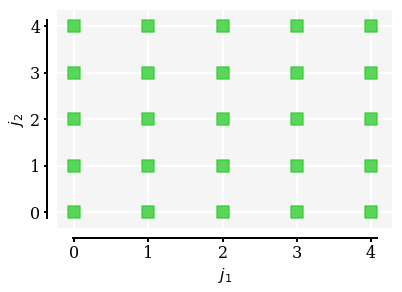

In [257]:
# define polynomial basis
basis = IndexSet("Tensor grid", [pt_count-1, pt_count-1])
basis.plot()

In [258]:
uq = Polylsq([x1,x2], basis)
uq.set_no_of_evals(pt_count*pt_count) # number of sample points

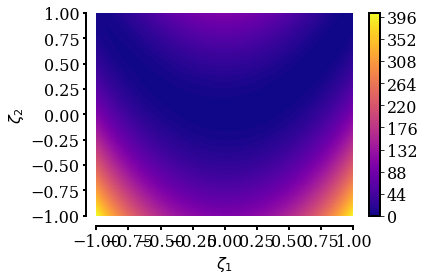

In [259]:
# plot analytic solution
xvec = np.linspace(-1.,1.,40)                               
x,y = np.meshgrid(xvec, xvec)
z = (1 - x)**2 + 100*(y - x**2)**2
plotting.contour_plot(x, y, z, 'analytic.eps')

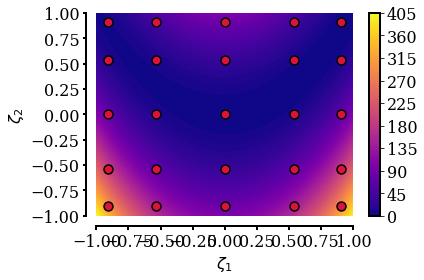

In [260]:
# Approximation with tensor grid polynomial and tensor grid sample points
stackOfPoints, x1, x2 = meshgrid(-1.0, 1.0, 40, 40)
zapprox = uq.getPolynomialApproximation(stackOfPoints, f)
zapprox = zapprox.reshape(40,40)
zapprox = zapprox.T
p_all = uq.subsampled_quadrature_points
plotting.contour_plot(x, y, zapprox, pts=p_all)

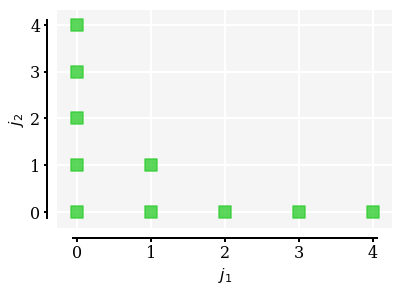

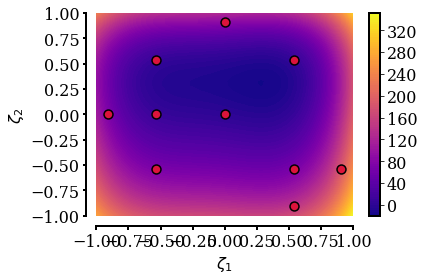

In [261]:
# Approximation with total order polynomial effective subsampling
x1 = Parameter(lower=-1, upper=1, points=pt_count, shape_parameter_A=0.1, shape_parameter_B=0.05, param_type='Uniform')
x2 = Parameter(lower=-1, upper=1, points=pt_count, shape_parameter_A=0.1, shape_parameter_B=0.05, param_type='Uniform')

#basis = IndexSet("Total order", [pt_count-1, pt_count-1])
basis = IndexSet("Hyperbolic basis", [pt_count-1, pt_count-1], q=0.6)
basis.plot()

uq = Polylsq([x1,x2], basis)
minimum_subsamples = uq.least_no_of_subsamples_reqd() 
uq.set_no_of_evals(minimum_subsamples)

zapprox = uq.getPolynomialApproximation(stackOfPoints, f)
zapprox = zapprox.reshape(40,40)
zapprox = zapprox.T
p = uq.subsampled_quadrature_points
plotting.contour_plot(x, y, zapprox, pts=p)

In [262]:
# Subsampled statistics
statistics = uq.stats(f)
print("mean", statistics.mean)
print("stddev", np.sqrt(statistics.variance))

mean 67.6689265796
stddev 62.8155438442


In [263]:
# Tensor grid statistics
x1 = Parameter(lower=-1, upper=1, points=pt_count, shape_parameter_A=0.1, shape_parameter_B=0.05, param_type='Uniform')
x2 = Parameter(lower=-1, upper=1, points=pt_count, shape_parameter_A=0.1, shape_parameter_B=0.05, param_type='Uniform')

basis = IndexSet("Tensor grid", [pt_count-1, pt_count-1])

uq = Polylsq([x1,x2], basis)
uq.set_no_of_evals(pt_count*pt_count)

statistics = uq.stats(f)
print("mean", statistics.mean)
print("stddev", np.sqrt(statistics.variance))

mean 54.6666666667
stddev 65.4471312139
